# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Exploration

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


We have a sample of 1348 images, each containing 62 x 47 pixels

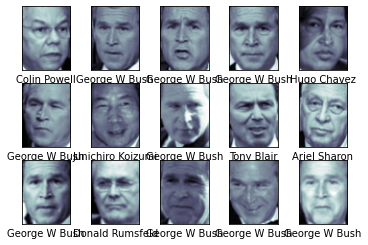

In [4]:
fig,ax= plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

Rather than using each pixel as an independent feature, we use preprocessing to choose the relevant features that wont reduce our efficiency.
We use PCA for this task.

# Data Preprocessing

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca=RandomizedPCA(n_components=150, whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(faces.data,faces.target,random_state=42)

In [7]:
# c controls margin hardness
# gamma controls size of rbf kernel

# GridSearch Cross Validation

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid={'svc__C':[1,5,10,15],'svc__gamma':[0.0001,0.0005,0.001,0.005]}

grid=GridSearchCV(model,param_grid)

In [9]:
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


Using Cross Validation, we find the best values for parameters 'C'and 'Gamma' which help maximise our scores

In [10]:
model=grid.best_estimator_
yfit=model.predict(X_test)

# Visualising the results

Text(0.5, 0.98, 'Predicted Name; Incorrect Labels in Red ')

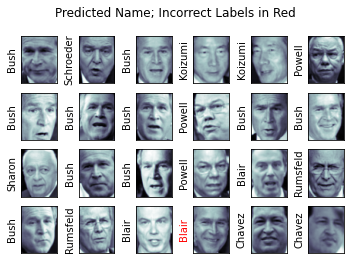

In [11]:
fig,ax= plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i]==Y_test[i] else 'red')
    
fig.suptitle('Predicted Name; Incorrect Labels in Red ')    

# Evaluating the results

In [12]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(83.40000000000006, 0.5, 'Prediction')

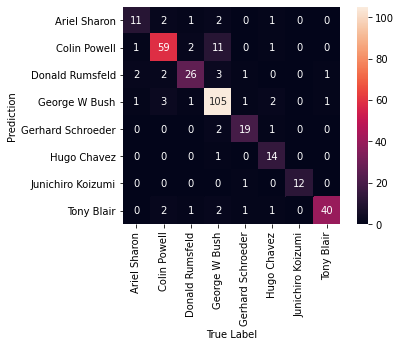

In [14]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Prediction')

This heatmap shows us which observations are most likely to get confused with others 